# **STEP 1 — Notebook Setup**

Task 1: Import Pandas, Numpy, Matplotlib, Seaborn

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task 2: Import Train-Test Split, Logistic Regression, Decision Tree, and Evaluation Metrics

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


# **STEP 2 — Load Cleaned Dataset**

**Task 3: (A) Load payment_fraud_clean.csv**


In [33]:
df = pd.read_csv('/content/payment_fraud_clean.csv')

 **(B) Print first 5 rows**

In [34]:
print(df.head(5))

   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1 -0.799783  C1231006815      -0.257201       -0.263611  M1979787155   
1     1 -0.847677  C1666544295      -0.310720       -0.313591  M2044282225   
2     1 -0.857785  C1305486145      -0.318293       -0.320466   C553264065   
3     1 -0.857785   C840083671      -0.318293       -0.320466    C38997010   
4     1 -0.788803  C2048537720      -0.303421       -0.309866  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  balance_diff  \
0       -0.395328       -0.448067        0               0       9839.64   
1       -0.395328       -0.448067        0               0       1864.28   
2       -0.395328       -0.448067        1               0        181.00   
3       -0.386395       -0.448067        1               0        181.00   
4       -0.395328       -0.448067        0               0      11668.14   

   high_amount_flag  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFE

**(C) Print shape**

In [47]:
print(df.shape)

(192592, 16)


# **STEP 3 — Fraud Distribution Check**

**Task 4: Find how many fraud vs non-fraud rows**

In [46]:
print("Fraud vs Non-Fraud Counts :")
print(df['isFraud'].value_counts())

Fraud vs Non-Fraud Counts :
isFraud
0    192449
1       143
Name: count, dtype: int64


**Task 5: Plot a countplot for isFraud**

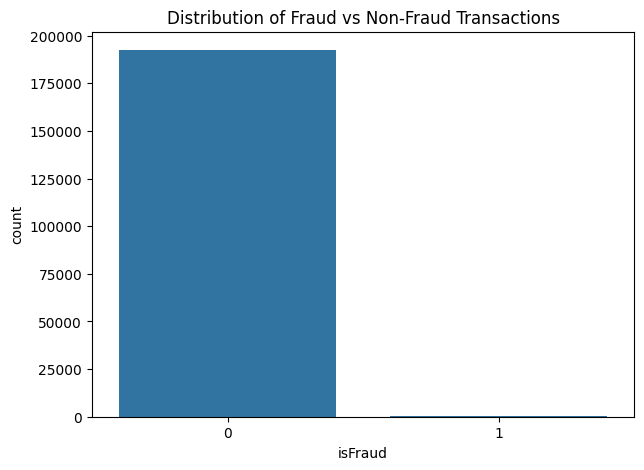

In [37]:
plt.figure(figsize=(7, 5))
sns.countplot(x='isFraud' , data=df)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()


# **STEP 4 — Prepare Features**

**Task 6:**

**X = dataset without target**

**y = isFraud only**

In [38]:
# X is the dataset without the target column
X = df.drop('isFraud' , axis=1)

# Y is the target column only
y =df['isFraud']

Task 7:   Train-test split with:
          test_size = 0.2
          stratify = y
          random_state = 42


In [39]:
from sklearn.model_selection import train_test_split
X_train ,X_test , Y_train , Y_test = \
train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print("Shape of X_train :",
X_train.shape)
print("shape of X_test :",
X_test.shape)

Shape of X_train : (154073, 15)
shape of X_test : (38519, 15)


# **STEP 5 — MODEL 1 → Logistic Regression**

**Task 8: Train Logistic Regression Predict on test set**

In [41]:
# Drop non-numeric columns that cause issues with Logistic Regression
X_train_processed = X_train.drop(['nameOrig', 'nameDest'], axis=1)
X_test_processed = X_test.drop(['nameOrig', 'nameDest'], axis=1)

# 1. Train Logistic Regression and Product
log_reg = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence, added random_state for reproducibility

# 2.Train the model (fit) using the processed training data
log_reg.fit(X_train_processed , Y_train)

# 3. Make predictions on the processed test data
y_pred_log = log_reg.predict(X_test_processed)
y_prob_log = log_reg.predict_proba(X_test_processed)[:, 1]

**Task 9:**
**Print:**
**Classification Report ,**
**Confusion Matrix ,**
**AUC Score**

In [43]:
# Classification Report

print("\nLogistic Regression Classification Reports :")
print(classification_report(Y_test, y_pred_log))


Logistic Regression Classification Reports :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38490
           1       1.00      0.17      0.29        29

    accuracy                           1.00     38519
   macro avg       1.00      0.59      0.65     38519
weighted avg       1.00      1.00      1.00     38519



In [45]:
# Confusion Matrix

print("Logistic Regression Confusion Matrix :")
print(confusion_matrix(Y_test, y_pred_log))

Logistic Regression Confusion Matrix :
[[38490     0]
 [   24     5]]


In [48]:
# AUC Score

auc_log = roc_auc_score(Y_test, y_prob_log)
print(f"Logistic Regression AUC Score : {auc_log:.4f}")

Logistic Regression AUC Score : 0.9320


# **STEP 6 — MODEL 2 → Decision Tree**

**Task 10: Train Decision Tree (depth = 5) Predict**

In [52]:
# 1. Initialize the model with a depth limit to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [53]:
# 2. Train the model
dt_model.fit(X_train_processed, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [56]:
# 3. Make predictions
y_pred_dt = dt_model.predict(X_test_processed)
y_prob_dt = dt_model.predict_proba(X_test_processed)[:, 1]

**Task 11: Print same evaluation metrics as above**

In [60]:
print("Decision Tree Classification Reports :")
print(classification_report(Y_test, y_pred_dt))

Decision Tree Classification Reports :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38490
           1       0.80      0.14      0.24        29

    accuracy                           1.00     38519
   macro avg       0.90      0.57      0.62     38519
weighted avg       1.00      1.00      1.00     38519



In [61]:
print("Decision Tree Confusio Matrix :")
print(confusion_matrix(Y_test , y_pred_dt))

Decision Tree Confusio Matrix :
[[38489     1]
 [   25     4]]


In [62]:
auc_dt = roc_auc_score(Y_test, y_pred_dt)
print(f"Decision Tree AUC Score : {auc_dt:.4f}")

Decision Tree AUC Score : 0.5690


# **STEP 7 — Model Comparison**

**Task 12: In markdown → create a table**

In [66]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

# 1. Calculate metrics for  Logistic Regression
acc_log = accuracy_score(Y_test ,y_pred_log)
prec_log = precision_score(Y_test ,y_pred_log)
rec_log = recall_score(Y_test ,y_pred_log)
auc_log = roc_auc_score(Y_test ,y_prob_log)

# 2. Calculate metrics for Decision Tree
acc_dt = accuracy_score(Y_test ,y_pred_dt)
prec_dt = precision_score(Y_test ,y_pred_dt)
rec_dt = recall_score(Y_test ,y_pred_dt)
auc_dt = roc_auc_score(Y_test ,y_prob_dt)

# 3. Create a DataFrame to display the table
comparsion_df = pd.DataFrame({
    'Metric' : ['Accuracy', 'Precision', 'Recall', 'AUC'],
    'Logistic Regression' :[acc_log, prec_log, rec_log, auc_log],
    'Decision Tree' : [acc_dt, prec_dt, rec_dt, auc_dt]
})

print("----- Model Comparison Table ------")
print(comparsion_df)


----- Model Comparison Table ------
      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.999377       0.999325
1  Precision             1.000000       0.800000
2     Recall             0.172414       0.137931
3        AUC             0.931968       0.800556


# **STEP 8 - Bonus Tasks**

**Task 13: Plot confusion matrix for both models using heatmap.**

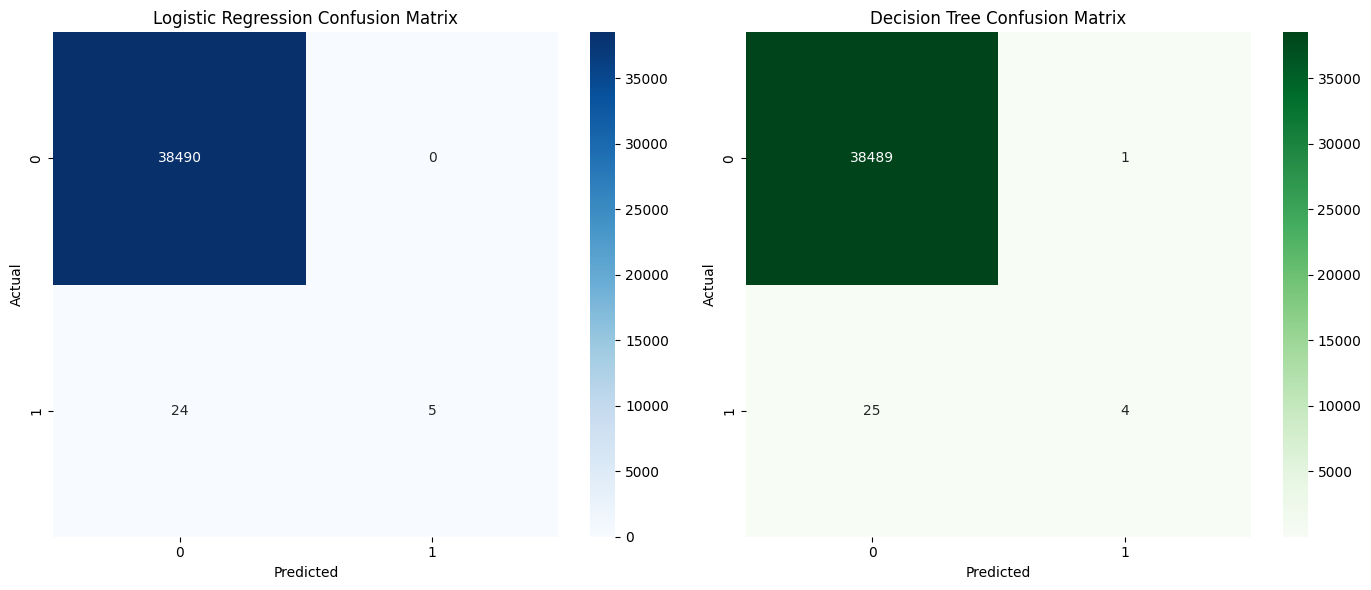

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Logistic Regression Heatmap ---
cm_log = confusion_matrix(Y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# --- Plot 2: Decision Tree Heatmap ---
cm_dt = confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**Task 14: Calculate recall for fraud (Class 1) and explain importance.**

In [69]:
print("--- Fraud Detection Capabilities (Recall for Class 1) ---")

# Calculate Recall specifically for the "Fraud" class (1)
recall_log_score = recall_score(Y_test, y_pred_log, pos_label=1)
recall_dt_score = recall_score(Y_test, y_pred_dt, pos_label=1)

print(f"Logistic Regression Recall: {recall_log_score:.2%}")
print(f"Decision Tree Recall:       {recall_dt_score:.2%}")

# Explanation logic
winner = "Decision Tree" if recall_dt_score > recall_log_score else "Logistic Regression"
print(f"\nCONCLUSION: The {winner} is better at catching fraud.")

--- Fraud Detection Capabilities (Recall for Class 1) ---
Logistic Regression Recall: 17.24%
Decision Tree Recall:       13.79%

CONCLUSION: The Logistic Regression is better at catching fraud.


**Task 15 : ROC Curve Plot**

--- Plotting ROC Curves ---


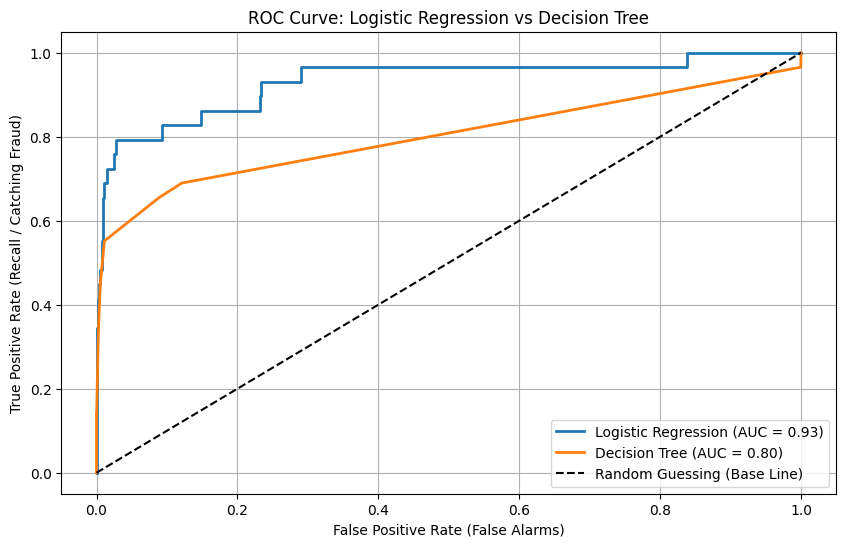

In [72]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC CURVE VISUALIZATION

print("--- Plotting ROC Curves ---")

# 1. Calculate the curve data (FPR and TPR) for both models
fpr_log, tpr_log, _ = roc_curve(Y_test, y_prob_log)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_prob_dt)

# 2. Setup the plot
plt.figure(figsize=(10, 6))

# 3. Plot Logistic Regression Line
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linewidth=2)

# 4. Plot Decision Tree Line
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2)

# 5. Plot the diagonal line (Random Guessing - 50%)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (Base Line)')

# 6. Formatting
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall / Catching Fraud)')
plt.title('ROC Curve: Logistic Regression vs Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()